## Import Library and Data

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
# taking scrapped data
data = pd.read_csv('Twitter_data.csv')
data.head()

,UserName,Text
0,Barack Obama,Georgia’s runoff election will determine wheth...
1,Barack Obama,Here’s a great way to call voters in Georgia a...
2,Barack Obama,Happy Hanukkah to all those celebrating around...
3,Barack Obama,"In A Promised Land, I talk about the decisions..."
4,Barack Obama,Michelle and I are eager to bring the Obama Pr...


In [3]:
data.shape

(406, 2)

In [4]:
data.describe()

,UserName,Text
count,406,406
unique,23,397
top,Barack Obama,"Today, we’re reminded of our solemn obligation..."
freq,353,2


In [5]:
cols = [1]
df = data[data.columns[cols]]

In [6]:
df

,Text
0,Georgia’s runoff election will determine wheth...
1,Here’s a great way to call voters in Georgia a...
2,Happy Hanukkah to all those celebrating around...
3,"In A Promised Land, I talk about the decisions..."
4,Michelle and I are eager to bring the Obama Pr...
...,...
401,"If you can still vote early, then vote early t..."
402,Today is the first day of Open Enrollment. If ...
403,"Folks, there are just three days left to vote ..."
404,Shoot your shot. http://iwillvote.com


## Data Cleaning

#### 1. Removing Twitter Handles (@user)

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [8]:
# remove twitter handles (@user)
df['tidy_tweet'] = np.vectorize(remove_pattern)(str(df['Text']), "@[\w]*") 
df.head()

,Text,tidy_tweet
0,Georgia’s runoff election will determine wheth...,0 Georgia’s runoff election will determin...
1,Here’s a great way to call voters in Georgia a...,0 Georgia’s runoff election will determin...
2,Happy Hanukkah to all those celebrating around...,0 Georgia’s runoff election will determin...
3,"In A Promised Land, I talk about the decisions...",0 Georgia’s runoff election will determin...
4,Michelle and I are eager to bring the Obama Pr...,0 Georgia’s runoff election will determin...


#### 2. Removing Punctuations, Numbers, and Special Characters

In [9]:
df['tidy_tweet'] = df['Text'].str.replace("[^a-zA-Z#]", " ")
df.head(10)

,Text,tidy_tweet
0,Georgia’s runoff election will determine wheth...,Georgia s runoff election will determine wheth...
1,Here’s a great way to call voters in Georgia a...,Here s a great way to call voters in Georgia a...
2,Happy Hanukkah to all those celebrating around...,Happy Hanukkah to all those celebrating around...
3,"In A Promised Land, I talk about the decisions...",In A Promised Land I talk about the decisions...
4,Michelle and I are eager to bring the Obama Pr...,Michelle and I are eager to bring the Obama Pr...
5,Watch Now: \n@BarackObama\n joins \n@MBK_Allia...,Watch Now BarackObama joins MBK Alliance...
6,This was fun. I heard Tim and Fred were listen...,This was fun I heard Tim and Fred were listen...
7,"My memoir, A Promised Land, is out today. I ho...",My memoir A Promised Land is out today I ho...
8,Music has always played an important role in m...,Music has always played an important role in m...
9,"More than anyone else, I wrote my book for you...",More than anyone else I wrote my book for you...


#### 3. Removing Short Words

In [10]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>3]))
df.head(10)

,Text,tidy_tweet
0,Georgia’s runoff election will determine wheth...,Georgia runoff election will determine whether...
1,Here’s a great way to call voters in Georgia a...,Here great call voters Georgia help them ready...
2,Happy Hanukkah to all those celebrating around...,Happy Hanukkah those celebrating around world ...
3,"In A Promised Land, I talk about the decisions...",Promised Land talk about decisions make during...
4,Michelle and I are eager to bring the Obama Pr...,Michelle eager bring Obama Presidential Center...
5,Watch Now: \n@BarackObama\n joins \n@MBK_Allia...,Watch BarackObama joins Alliance youth communi...
6,This was fun. I heard Tim and Fred were listen...,This heard Fred were listening some songs Prom...
7,"My memoir, A Promised Land, is out today. I ho...",memoir Promised Land today hope read goal give...
8,Music has always played an important role in m...,Music always played important role life that e...
9,"More than anyone else, I wrote my book for you...",More than anyone else wrote book young people ...


#### 4. Text Normalization

In [11]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet

0      [Georgia, runoff, election, will, determine, w...
1      [Here, great, call, voters, Georgia, help, the...
2      [Happy, Hanukkah, those, celebrating, around, ...
3      [Promised, Land, talk, about, decisions, make,...
4      [Michelle, eager, bring, Obama, Presidential, ...
                             ...                        
401    [still, vote, early, then, vote, early, today,...
402    [Today, first, Open, Enrollment, need, coverag...
403    [Folks, there, just, three, days, left, vote, ...
404                 [Shoot, your, shot, http, iwillvote]
405    [Stella, thank, being, poll, worker, making, d...
Name: tidy_tweet, Length: 406, dtype: object

#### Checking the length of original text and clean text

In [12]:
df['len_o'] = df['Text'].str.len()
df['len_new'] = df['tidy_tweet'].str.len()

df.head(10)

,Text,tidy_tweet,len_o,len_new
0,Georgia’s runoff election will determine wheth...,Georgia runoff election will determine whether...,336,250
1,Here’s a great way to call voters in Georgia a...,Here great call voters Georgia help them ready...,478,335
2,Happy Hanukkah to all those celebrating around...,Happy Hanukkah those celebrating around world ...,271,193
3,"In A Promised Land, I talk about the decisions...",Promised Land talk about decisions make during...,269,186
4,Michelle and I are eager to bring the Obama Pr...,Michelle eager bring Obama Presidential Center...,255,177
5,Watch Now: \n@BarackObama\n joins \n@MBK_Allia...,Watch BarackObama joins Alliance youth communi...,178,129
6,This was fun. I heard Tim and Fred were listen...,This heard Fred were listening some songs Prom...,263,161
7,"My memoir, A Promised Land, is out today. I ho...",memoir Promised Land today hope read goal give...,291,188
8,Music has always played an important role in m...,Music always played important role life that e...,252,199
9,"More than anyone else, I wrote my book for you...",More than anyone else wrote book young people ...,510,368


In [13]:
# write file with clean text
with open("TwitterCleanText.txt","w",encoding='utf8') as output:
    d = [contents for contents in df['tidy_tweet']]
    output.write(str(d))

In [14]:
# read clean text file
with open("TwitterCleanText.txt","r") as dataFile:
    dataClean = dataFile.read()
dataClean

"['Georgia runoff election will determine whether American people have Senate that actually fighting them involved right make calls chip whatever help elect ReverendWarnock Ossoff Help Flip Senate Democrats need flip seats take back Senate flipthesenate', 'Here great call voters Georgia help them ready vote couple hours this weekend could help Democrats Senate Quote Tweet Vote Saved America votesaveamerica days left till runoff elections Georgia rtnered NextGenAmerica make calls young voters make sure they vote mail person early starting Monday sidelines another http votesave NextGenGA', 'Happy Hanukkah those celebrating around world This year tested also clarified what really matters lights menorah remind cherish blessings have offer glimmers hope From family yours Chag Sameach', 'Promised Land talk about decisions make during first years presidency Here some thoughts approach tough questions Approach Toughest Decisions choices reflect determine barackobama medium', 'Michelle eager br

## Analysis

In [15]:
# words in the twitter's tweet
words_in_dataClean = dataClean.split(" ")[2:-2]
words_in_dataClean

['election',
 'will',
 'determine',
 'whether',
 'American',
 'people',
 'have',
 'Senate',
 'that',
 'actually',
 'fighting',
 'them',
 'involved',
 'right',
 'make',
 'calls',
 'chip',
 'whatever',
 'help',
 'elect',
 'ReverendWarnock',
 'Ossoff',
 'Help',
 'Flip',
 'Senate',
 'Democrats',
 'need',
 'flip',
 'seats',
 'take',
 'back',
 'Senate',
 "flipthesenate',",
 "'Here",
 'great',
 'call',
 'voters',
 'Georgia',
 'help',
 'them',
 'ready',
 'vote',
 'couple',
 'hours',
 'this',
 'weekend',
 'could',
 'help',
 'Democrats',
 'Senate',
 'Quote',
 'Tweet',
 'Vote',
 'Saved',
 'America',
 'votesaveamerica',
 'days',
 'left',
 'till',
 'runoff',
 'elections',
 'Georgia',
 'rtnered',
 'NextGenAmerica',
 'make',
 'calls',
 'young',
 'voters',
 'make',
 'sure',
 'they',
 'vote',
 'mail',
 'person',
 'early',
 'starting',
 'Monday',
 'sidelines',
 'another',
 'http',
 'votesave',
 "NextGenGA',",
 "'Happy",
 'Hanukkah',
 'those',
 'celebrating',
 'around',
 'world',
 'This',
 'year',
 'test

In [17]:
# open user defined stopwords file
with open("../stop.txt","r") as sw:
    stopwords_user = sw.read()

print('Total length (user defined file):',len(stopwords_user))

Total length (user defined file): 3588


In [18]:
stopwords_user = stopwords_user.replace('\n', ' ')

In [19]:
# add user defined stopwords into existing English langage stopwords
my_stop_words1 = stopwords.words('english')

for sub in stopwords_user:
    my_stop_words1.append(stopwords_user)

In [20]:
print('Stpwords in the pre-defined English :', len(stopwords.words('english')))
print('Stpwords in the user defined file   :', len(stopwords_user))
print('Stpwords as total counts            :', len(my_stop_words1))

Stpwords in the pre-defined English : 179
Stpwords in the user defined file   : 3588
Stpwords as total counts            : 3767


- Here, we add the user defined words with English stopwords, and make analysis

In [21]:
words_in_dataClean = [w for w in words_in_dataClean if not w in my_stop_words1]
words_in_dataClean

['election',
 'determine',
 'whether',
 'American',
 'people',
 'Senate',
 'actually',
 'fighting',
 'involved',
 'right',
 'make',
 'calls',
 'chip',
 'whatever',
 'help',
 'elect',
 'ReverendWarnock',
 'Ossoff',
 'Help',
 'Flip',
 'Senate',
 'Democrats',
 'need',
 'flip',
 'seats',
 'take',
 'back',
 'Senate',
 "flipthesenate',",
 "'Here",
 'great',
 'call',
 'voters',
 'Georgia',
 'help',
 'ready',
 'vote',
 'couple',
 'hours',
 'weekend',
 'could',
 'help',
 'Democrats',
 'Senate',
 'Quote',
 'Tweet',
 'Vote',
 'Saved',
 'America',
 'votesaveamerica',
 'days',
 'left',
 'till',
 'runoff',
 'elections',
 'Georgia',
 'rtnered',
 'NextGenAmerica',
 'make',
 'calls',
 'young',
 'voters',
 'make',
 'sure',
 'vote',
 'mail',
 'person',
 'early',
 'starting',
 'Monday',
 'sidelines',
 'another',
 'http',
 'votesave',
 "NextGenGA',",
 "'Happy",
 'Hanukkah',
 'celebrating',
 'around',
 'world',
 'This',
 'year',
 'tested',
 'also',
 'clarified',
 'really',
 'matters',
 'lights',
 'menorah',

#### 1. Analyzing with stopwords

In [22]:
normal_words_in_dataClean = " ".join(words_in_dataClean)

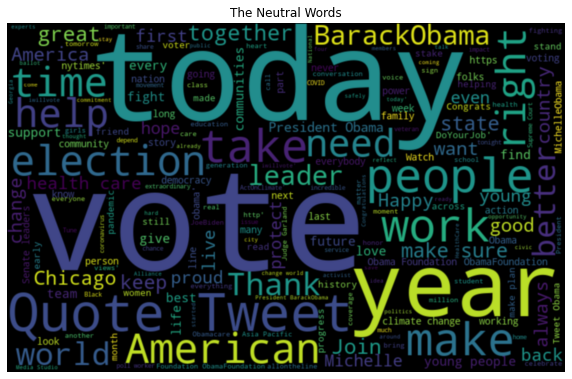

In [23]:
wordcloud = WordCloud(width=800, height=500, random_state=8).generate(normal_words_in_dataClean)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bicubic")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

#### 2. Analyzing with positive words

In [24]:
with open("../positive-words.txt","r") as sw:
    positive_words = sw.read()

In [25]:
# removing the starting strings and collect actual posotive words
positive_words = positive_words[1537:].replace('\n', ' ') 

In [26]:
positive_words_in_dataClean = " ".join ([w for w in words_in_dataClean if w in positive_words])

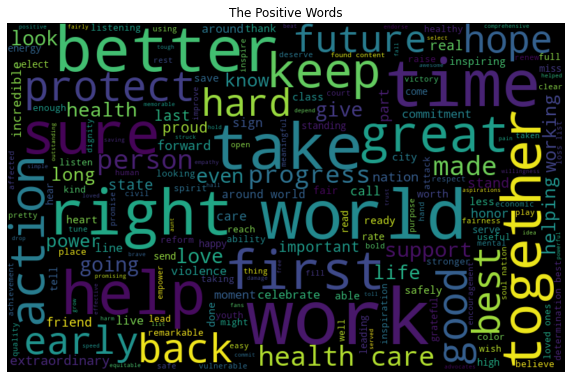

In [27]:
wordcloud = WordCloud(width=800, height=500, random_state = 1, max_font_size = 110).generate(positive_words_in_dataClean)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

#### 3. Analyzing with negative words

In [28]:
with open("../negative-words.txt","r") as sw:
    negative_words = sw.read()

In [29]:
# removing the starting strings and collect actual posotive words
negative_words = negative_words[1540:].replace('\n', ' ') 

In [30]:
negative_words_in_dataClean = " ".join([w for w in words_in_dataClean if w in negative_words])

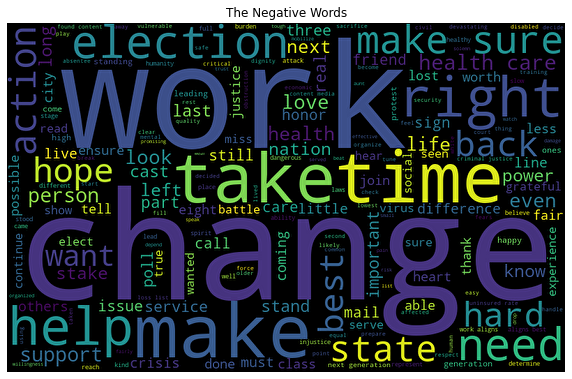

In [31]:
wordcloud = WordCloud(width=800, height=500, random_state=15).generate(negative_words_in_dataClean)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="sinc")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

#### 4.  Analyze the Hashtags on Tweets Sentiments

In [32]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [33]:
HT_regular = hashtag_extract(df['tidy_tweet'])
HT_regular = sum(HT_regular,[])
HT_regular

['VoteEarlyDay',
 'BidenHarris',
 'pandemic',
 'vote',
 'Vote',
 'VoteEarly',
 'Election',
 'FairMaps',
 'theprinceandthepresident',
 'inthehousethatslavesbuilt',
 'tbt',
 'DemsinPhilly',
 'DemConvention',
 'FourthOfJuly',
 'VoterSuppression',
 'WearOrange',
 'COVID',
 'COVID',
 'BlackHistoryMonth',
 'Oscars',
 'BlackHistoryMonth',
 'ObamaLeaders',
 'ObamaSummit',
 'ObamaSummit',
 'DayoftheGirl',
 'OneNationOneTeam',
 'OneNationOneTeam',
 'OneNationOneTeam',
 'PrideMonth',
 'PrideTurban',
 'LoveIsLove',
 'NatsAcademy',
 'ObamaTownHall',
 'ObamaSummit',
 'InternationalMentoringDay',
 'ObamaFellows',
 'GetCovered',
 'DayoftheGirl',
 'GlobalGirlsAlliance',
 'RFK',
 'WearOrange',
 'EndGunViolence',
 'ObamaFellows',
 'Aggies',
 'GigEm',
 'GetCovered',
 'ObamaInIndia',
 'Goalkeepers',
 'CSforALL',
 'FathersDay',
 'Merkel',
 'Manchester',
 'FarewellAddress',
 'ObamaFarewell',
 'Obamacare',
 'ParisAgreement',
 'ActOnClimate',
 'JobsReport',
 'GetCovered',
 'Obamacare',
 'Obamacare',
 'GetCover

In [34]:
from collections import Counter
r_keys = Counter(HT_regular).keys() # equals to list(set(words))
r_values = Counter(HT_regular).values() # counts the elements' frequency

In [35]:
df1 = pd.DataFrame(list(zip(r_keys, r_values)),  columns =['Name', 'val']) 

In [36]:
df1.sort_values(by='val', ascending=False).head()

,Name,val
46,ActOnClimate,15
50,DoYourJob,14
30,GetCovered,10
44,Obamacare,7
22,OneNationOneTeam,3


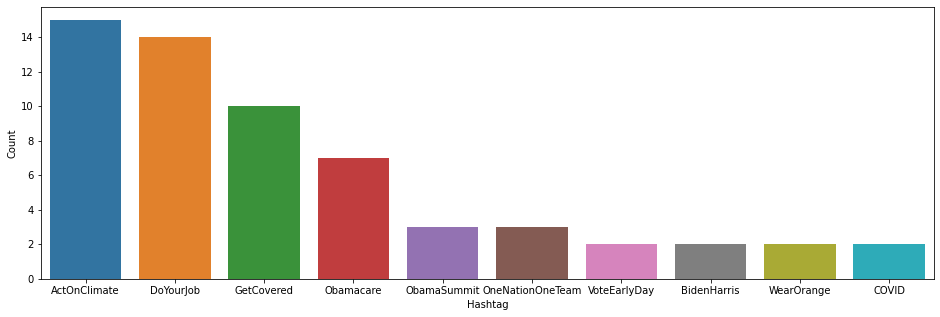

In [37]:
import seaborn as sns

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags    
d = d.nlargest(columns="Count", n = 10)  
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()